# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [1]:
!pip install smolagents

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [3]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=InferenceClientModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 1.51 seconds| Input tokens: 1,993 | Output tokens: 64]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 2: Duration 1.33 seconds| Input tokens: 4,148 | Output tokens: 146]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
  final_answer(highest_rated_catering_service)                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Final answer: Gotham Catering Co.

[Step 3: Duration 3.31 seconds| Input tokens: 6,483 | Output tokens: 231]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [4]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=InferenceClientModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  party_theme_idea = superhero_party_theme_generator(category="villain masquerade")                                
  print(party_theme_idea)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 2.11 seconds| Input tokens: 2,028 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  party_theme_idea = superhero_party_theme_generator(category="villain masquerade")                                
  final_answer(party_theme_idea)                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 2: Duration 1.08 seconds| Input tokens: 4,227 | Output tokens: 140]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [8]:
import os

party_theme_tool.push_to_hub("jblackwood12/catering_service_tool", token=os.environ.get("HF_TOKEN"))

README.md:   0%|          | 0.00/244 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/jblackwood12/catering_service_tool/commit/3da5fdd1c725f304076780e62e8d1b32a7769d86', commit_message='Upload tool', commit_description='', oid='3da5fdd1c725f304076780e62e8d1b32a7769d86', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/jblackwood12/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='jblackwood12/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = ("A luxurious superhero-themed party at Wayne Manor. The interior is opulent with dark wood furniture,  
  chandeliers, and lavish decor. "                                                                                 
            "Made-up superheroes are present, including a hero with abilities similar to Batman but with blue      
  skin and red cape; "                                                                                             
            "another hero with the power to control shadows and wearing a black cloak with a silver mask; "        
            "and a heroine with the ability to manipulate fire and appearing in a fiery red dress. "               
            "The party ambiance is high-energy with guests in superhero costumes, delicious food and drinks, and   
  a grand stage for performances.")                                                                                
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x7EF5690B7B60>

[Step 1: Duration 4.30 seconds| Input tokens: 2,023 | Output tokens: 178]

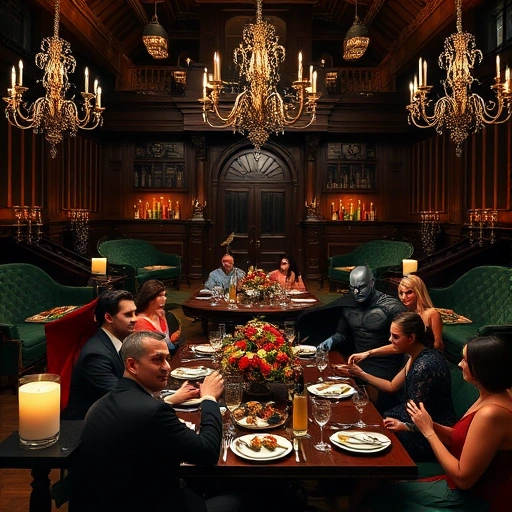

In [9]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [10]:
!pip install gradio_client

In [ ]:
from smolagents import CodeAgent, InferenceClientModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model, additional_authorized_imports=['random'])

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


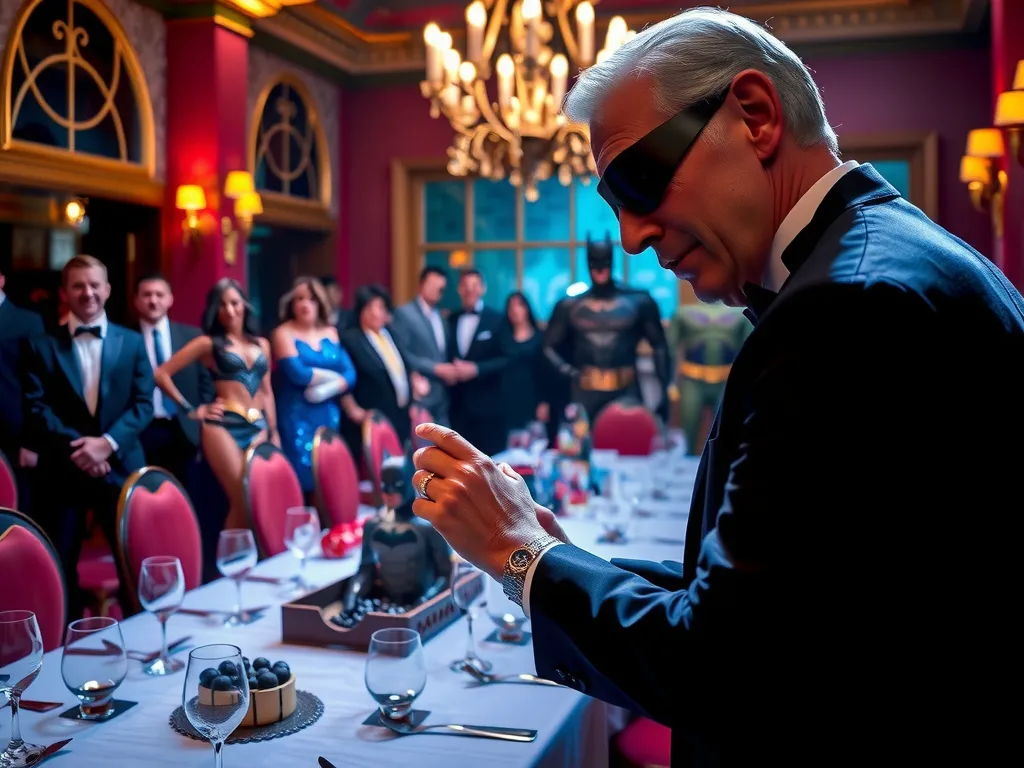

In [14]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/41ea1d0001256c81be8dc3277e400cfac95106fe804d27c2b949866bf89ca58e/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [15]:
!pip install langchain-community google-search-results

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.0 MB/s eta 0:00:00
  DEPRECATION: Building 'google-search-results' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'google-search-results'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=fdb7c11124ff9d4bd70ce1e7257c3bb99cfa6fa702f5eeb588fdadd09110f79d
  Stored in directory: /home/j/.cache/pip/wheels/44/af/e2/dde9fab6f1876485b72b35e9cd48da741da67d20e617c3b971
Successfully built google-sear

In [2]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  superhero_entertainment_ideas = search(tool_input="luxury entertainment ideas for superhero-themed event live    
  performances and interactive experiences")                                                                       
  print(superhero_entertainment_ideas)                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Comic-book-style images can be turned into live installations at events. Animated graphics and videos at the 2011
Robin Hood Foundation gala, helped add ...', 'Discover unique party entertainment ideas for any event size. From 
musical parties to adventurous ideas, find creative ways to entertain ...', 'This ultimate Marvel Party Ideas will 
unveil secrets to creating an immersive experience, from heroic decorations to action-packed entertainment.', 
'Whatever your event budget, here are 122 inspiring event entertainment ideas for a memorable and engaging 
experience.', 'Elevate your next office event with the best corporate party ideas! Find unique themes, entertaining
activities, and team-building must-dos.', '14 Superhero Birthday Party Ideas · 1. Spin Art Superhero · 2. Superhero
Academy · 3. Dress-Up Parade · 4. Superhero Face Transformation · 5.', 'Explore 29 conference entertainment ideas 
to boost engagement, build connections, and create memorable experiences.', 'Picture a superhero-themed birthday 
with capes and masks for all the little heroes, or a princess party adorned with tiaras and magic wands.', 'Explore
luxury event entertainment ideas for an upscale experience guests will never forget, including live performances 
and exclusive acts.', '23 Super Fun Superhero Event Theme ideas | new years eve events, superhero, corporate team 
building activities.']

Out: None

[Step 1: Duration 2.99 seconds| Input tokens: 2,000 | Output tokens: 75]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_superhero_entertainment_ideas = search(tool_input="luxury upscale entertainment ideas for                 
  superhero-themed event live performances and interactive experiences")                                           
  print(luxury_superhero_entertainment_ideas)                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Comic-book-style images can be turned into live installations at events. Animated graphics and videos at the 2011
Robin Hood Foundation gala, helped add ...', 'Discover unique party entertainment ideas for any event size. From 
musical parties to adventurous ideas, find creative ways to entertain ...', 'Explore luxury event entertainment 
ideas for an upscale experience guests will never forget, including live performances and exclusive acts.', 
'Whatever your event budget, here are 122 inspiring event entertainment ideas for a memorable and engaging 
experience.', "We've compiled a list of 75 cool post-Covid event themes, where we're sure you will find the most 
epic theme for your next party.", '23 Super Fun Superhero Event Theme ideas | new years eve events, superhero, 
corporate team building activities.', 'Explore 29 conference entertainment ideas to boost engagement, build 
connections, and create memorable experiences.', 'Count on us to deliver nothing but excellence in upscale event 
entertainment. From interactive theater to breathtaking acrobatics, captivating musical ...', 'A superhero 
scavenger hunt is a fun and interactive way to engage your guests. Hide clues or “supervillain” messages around 
your party venue that lead to a ...', "Here's our top 23 themed corporate event ideas to inspire you to create 
unforgettable experiences in 2025, regardless of your workplace!", [{'position': 1, 'rating': 4.8, 'reviews': 1500,
'reviews_original': '(1.5K)', 'price': '$50–100', 'description': '"The magician was engaging and the magic tricks 
were phenomenal."', 'lsig': 'AB86z5X84UvXKpGhumys4A7AY41b', 'thumbnail': 
'https://serpapi.com/searches/689e28cff052757cef3c1f53/images/41cdbb1bd33c0459e42a5445bb0cefbe4f8ec58a39c291e635a1d
e912c85efa1ce99f0c59decefca.jpeg', 'place_id': '16520265613785372014', 'place_id_search': 
'https://serpapi.com/search.json?device=desktop&engine=google&gl=us&google_domain=google.com&hl=en&ludocid=16520265
613785372014&q=luxury+upscale+entertainment+ideas+for+superhero-themed+event+live+performances+and+interactive+expe
riences', 'gps_coordinates': {'latitude': 40.01334, 'longitude': -76.133896}, 'title': 'Magic & Wonder Dinner 
Theater', 'type': 'Dinner theater', 'address': 'Paradise, PA'}, {'position': 2, 'rating': 5.0, 'reviews': 28, 
'reviews_original': '(28)', 'description': '"Superhero Stu provided a great experience!"', 'lsig': 
'AB86z5UiK8K_sBLby4GyuToDc80f', 'thumbnail': 
'https://serpapi.com/searches/689e28cff052757cef3c1f53/images/41cdbb1bd33c0459e42a5445bb0cefbebdeb5196b148fa3b245b6
eb660b50cc5570bfb4e752d2401.jpeg', 'place_id': '4483216350053646385', 'place_id_search': 
'https://serpapi.com/search.json?device=desktop&engine=google&gl=us&google_domain=google.com&hl=en&ludocid=44832163
50053646385&q=luxury+upscale+entertainment+ideas+for+superhero-themed+event+live+performances+and+interactive+exper
iences', 'gps_coordinates': {'latitude': 38.961613, 'longitude': -77.073906}, 'title': 'Superhero Stu', 'type': 
'Event planner', 'address': 'Washington, DC'}, {'position': 3, 'rating': 5.0, 'reviews': 26, 'reviews_original': 
'(26)', 'description': '"They are so fun, unique and very memorable."', 'lsig': 'AB86z5Uo4CPqMeEhLkcr3Xk233Kq', 
'thumbnail': 
'https://serpapi.com/searches/689e28cff052757cef3c1f53/images/41cdbb1bd33c0459e42a5445bb0cefbee48fcf56260f21b2be16d
94ce3d819df0935248d5e39d18c.jpeg', 'place_id': '1065864138102592414', 'place_id_search': 
'https://serpapi.com/search.json?device=desktop&engine=google&gl=us&google_domain=google.com&hl=en&ludocid=10658641
38102592414&q=luxury+upscale+entertainment+ideas+for+superhero-themed+event+live+performances+and+interactive+exper
iences', 'gps_coordinates': {'latitude': 38.961613, 'longitude': -77.073906}, 'title': 'STUpendous Events, LLC', 
'type': 'Event planner', 'address': 'Washington, DC'}]]

Out: None

[Step 2: Duration 2.74 seconds| Input tokens: 4,440 | Output tokens: 159]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Extracting relevant information from the search results                                                        
  results = [                                                                                                      
      '"The magician was engaging and the magic tricks were phenomenal."',                                         
      '"Superhero Stu provided a great experience!"',                                                              
      '"They are so fun, unique and very memorable."'                                                              
  ]                                                                                                                
                                                                                                                   
  print("Relevant results for luxury entertainment ideas:")                                                        
  for result in results:                                                                                           
      print(result)                                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Relevant results for luxury entertainment ideas:
"The magician was engaging and the magic tricks were phenomenal."
"Superhero Stu provided a great experience!"
"They are so fun, unique and very memorable."

Out: None

[Step 3: Duration 1.94 seconds| Input tokens: 8,409 | Output tokens: 276]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_ideas = [                                                                                                 
      "Magician",                                                                                                  
      "Superhero Stu",                                                                                             
      "Interactive theater",                                                                                       
      "Breathtaking acrobatics",                                                                                   
      "Captivating musical acts"                                                                                   
  ]                                                                                                                
                                                                                                                   
  print("Luxury entertainment ideas for a superhero-themed event:")                                                
  for idea in luxury_ideas:                                                                                        
      print("-", idea)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Luxury entertainment ideas for a superhero-themed event:
- Magician
- Superhero Stu
- Interactive theater
- Breathtaking acrobatics
- Captivating musical acts

Out: None

[Step 4: Duration 2.16 seconds| Input tokens: 12,678 | Output tokens: 399]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Luxury entertainment ideas for a superhero-themed event include: Magician, Superhero Stu,          
  Interactive theater, Breathtaking acrobatics, and Captivating musical acts.")                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Luxury entertainment ideas for a superhero-themed event include: Magician, Superhero Stu, Interactive
theater, Breathtaking acrobatics, and Captivating musical acts.

[Step 5: Duration 1.47 seconds| Input tokens: 17,245 | Output tokens: 483]

'Luxury entertainment ideas for a superhero-themed event include: Magician, Superhero Stu, Interactive theater, Breathtaking acrobatics, and Captivating musical acts.'

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉